# EDA 2 : German Credit Risk

Dataset yang digunakan untuk EDA ini dapat diakses pada [German Credit Risk Dataset](https://www.kaggle.com/uciml/german-credit/).

In [62]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Load Data

In [4]:
german_cr = pd.read_csv('german-credit-risk\german_credit_data.csv')
german_cr.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


### Data Type

In [5]:
german_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


### Drop Column
Terdapat 1 features unik (Unnamed: 0) yang dapat dikatakan bahwa features tersebut tdk dapat dianalisis lebih lanjut. <br>
sehingga 1 features tersebut akan dihapuskan saja.

In [6]:
german_cr = german_cr.drop(columns = ['Unnamed: 0'], axis = 1)
german_cr.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


### Missing Values Detection

In [7]:
# Deteksi ada/tidaknya missing values pada setiap features

count_mv = german_cr.isnull().sum().sort_values(ascending = False)
count_mv.head(9)

Checking account    394
Saving accounts     183
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

In [8]:
# Melihat persentase missing values pada setiap features

pct_mv = round(german_cr.isnull().sum()/len(german_cr)*100,2).sort_values(ascending = False)
pct_mv.head(9)

Checking account    39.4
Saving accounts     18.3
Purpose              0.0
Duration             0.0
Credit amount        0.0
Housing              0.0
Job                  0.0
Sex                  0.0
Age                  0.0
dtype: float64

**Missing Value** <br>
Terdapat 2 features yang memiliki missing values, yaitu Checking account dan Saving accounts. Namun persentase missing valuesnya masih dibawah 60%. Jadi features tersebut masih dapat dipercaya sebagai sumber data yang representatif.

### Change Data Type
Karena tipe data Job adalah integer sementara Job termasuk dalam variabel categorical, maka perlu diubah menjadi tipe data string.

In [9]:
# Mengubah tipe data 'job' menjadi string
# sebab 'year' termasuk dalam variabel kategorik

german_cr['Job'] = german_cr['Job'].astype(str)
german_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null object
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


### Categorical vs. Numerical

In [11]:
# Mendefinisikan variabel kategorik

kategorik = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
categorical = german_cr[kategorik]
categorical.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose
0,male,2,own,NaN,little,radio/TV
1,female,2,own,little,moderate,radio/TV
2,male,1,own,little,NaN,education
3,male,2,free,little,little,furniture/equipment
4,male,2,free,little,little,car


In [12]:
# Mendefinisikan variabel numerical

numerical = german_cr.drop(kategorik, axis=1)
numerical.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


### Change Missing Values with Mean (Numerical) & Mode (Categorical)

In [13]:
# Menggantikan missing value dengan mode untuk data categorical

for cat in categorical:
    mode = categorical[cat].mode().values[0]
    categorical[cat] = categorical[cat].fillna(mode)
categorical.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Sex,Job,Housing,Saving accounts,Checking account,Purpose
0,male,2,own,little,little,radio/TV
1,female,2,own,little,moderate,radio/TV
2,male,1,own,little,little,education
3,male,2,free,little,little,furniture/equipment
4,male,2,free,little,little,car


In [14]:
# Melakukan pengecekan apakah seluruh missing values pada variabel categorical sudah tergantikan dengan mode nya

pct_cat = round(categorical.isnull().sum()/len(categorical)*100,2).sort_values(ascending = False)
pct_cat.head(6)

Purpose             0.0
Checking account    0.0
Saving accounts     0.0
Housing             0.0
Job                 0.0
Sex                 0.0
dtype: float64

### Univariate Analysis : Numerical Variable

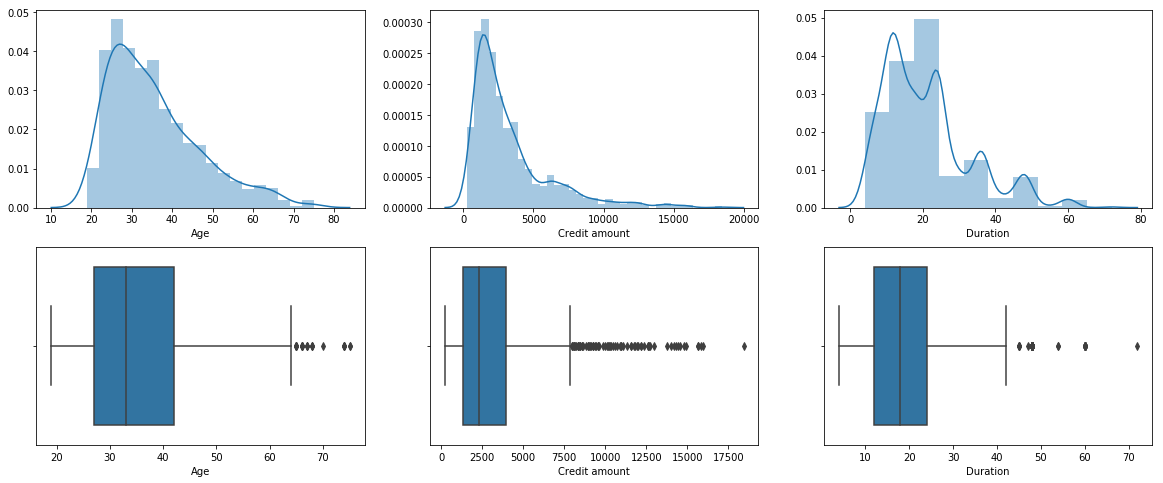

In [44]:
# Menampilkan distplot dan boxplot dari variabel numerical

f = plt.figure(figsize=(20,8))

f.add_subplot(2,3,1)
sns.distplot(numerical['Age'])

f.add_subplot(2,3,2)
sns.distplot(numerical['Credit amount'])

f.add_subplot(2,3,3)
sns.distplot(numerical['Duration'], bins=10)

f.add_subplot(2,3,4)
sns.boxplot(numerical['Age'])

f.add_subplot(2,3,5)
sns.boxplot(numerical['Credit amount'])

f.add_subplot(2,3,6)
sns.boxplot(numerical['Duration'])

**Distribution Plot** <br>
Dari gambar di atas terlihat bahwa features 'Age', 'Credit amount', dan 'Duration' memiliki skewness positif. Jadi dapat dikatakan bahwa mayoritas data berkumpul pada nilai yang kecil. Sehingga dapat dikatakan bahwa tingkat risiko kredit dari masyarakat German bernilai rendah, sebab: <br>
1. Mayoritas nasabah credit berusia produktif (antara 20 - 40 tahun). <br>
2. Mayoritas credit amount bernilai rendah (antara 0 - 5000). <br>
3. Mayoritas durasi credit dalam jangka pendek (antara 0 - 25 bulan). <br>

**Boxplot**
Dari gambar diatas terlihat bahwa banyaknya outliers pada 'Age' dan 'Duration' tidak terlalu banyak. Sementara outliers pada features 'Credit amount' bida dibilang banyak. Dari boxplot tersebut dapat dikatakan bahwa: <br>
1. Masih terdapat cukup banyak credit amount yang bernilai tinggi walaupun mayoritas credit amount masih berada dalam rentang yang rendah (antara 0 - 5000). <br>

### Univariate Analysis : Categorical Variable

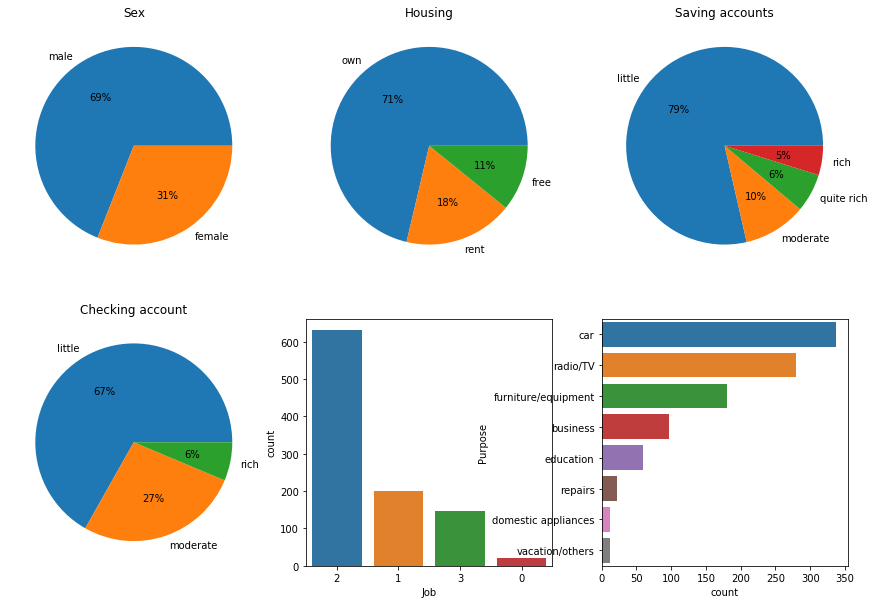

In [103]:
# Menampilkan distplot dan boxplot dari variabel categorical

f = plt.figure(figsize=(15,10))

f.add_subplot(2,3,1)
categorical['Sex'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('Sex')
plt.ylabel('')

f.add_subplot(2,3,2)
categorical['Housing'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('Housing')
plt.ylabel('')

f.add_subplot(2,3,3)
categorical['Saving accounts'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('Saving accounts')
plt.ylabel('')

f.add_subplot(2,3,4)
categorical['Checking account'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('Checking account')
plt.ylabel('')

f.add_subplot(2,3,5)
sns.countplot(categorical['Job'], order=categorical['Job'].value_counts().index)

f.add_subplot(2,3,6)
sns.countplot(y=categorical['Purpose'], order=categorical['Purpose'].value_counts().index)

**Pie Chart & Count Plot** <br>
Dari gambar di atas dapat dilihat bahwa: <br>
1. Mayoritas pelaku kredit adalah laki-laki. <br>
2. Mayoritas pelaku kredit telah memiliki rumah sendiri. <br>
3. Mayoritas pelaku kredit memiliki saving & Checking accounts berada pada tingkat rendah. <br>
4. Mayoritas pelaku kredit berprofesi pada kode 2 (skilled). <br>
5. Mayoritas barang yang dipilih oleh pelaku kredit adalah mobil. <br>

### Pair Plot

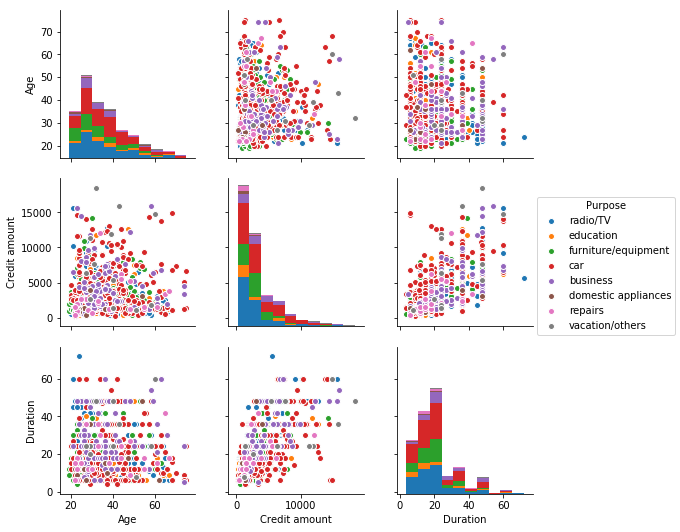

In [84]:
sns.pairplot(german_cr[['Age', 'Credit amount', 'Duration', 'Purpose']], hue = 'Purpose', diag_kind = 'hist')

**Pair Plot** <br>
Dari pair plot di atas dapat dilihat bahwa keterkaitan antara 3 features mayoritas berkumpul pada nilai yang kecil. Sehingga dapat disimpulkan bahwa mayoritas pelaku kredit berada pada usia produktif, durasi kredit berjangka pendek, dan credit amount bernilai rendah. Namun jenis barang yang diajukan untuk kredit bervariasi dari seluruh jenis yang ada pada data.

### Correlation of Numerical

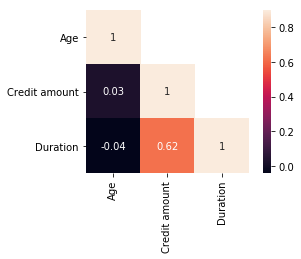

In [53]:
#create correlation
corr = numerical.corr(method = 'pearson').round(2)

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (8,5))
fig.set_size_inches(5,3)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

**Correlation of Numerical** <br>
Dari hitmap correlation di atas dapat dilihat bahwa korelasi terbesar terdapat pada features 'Credit amount' dan 'Duration'. Korelasi yang ditunjukkan bernilai positif, sehingga dapat dikatakan bahwa terdapat hubungan yang erat antara 'Credit amount' dan 'Duration' dengan nilai yang sebanding. Semakin tinggi 'Credit amount' maka semakin lama juga 'Duration' untuk menyelesaikan credit nya.

### Concate Numerical & Categorical

In [106]:
creditrisk = pd.concat([numerical, categorical], axis = 1)
creditrisk.head()

,Age,Credit amount,Duration,Sex,Job,Housing,Saving accounts,Checking account,Purpose
0,67,1169,6,male,2,own,little,little,radio/TV
1,22,5951,48,female,2,own,little,moderate,radio/TV
2,49,2096,12,male,1,own,little,little,education
3,45,7882,42,male,2,free,little,little,furniture/equipment
4,53,4870,24,male,2,free,little,little,car


### 1. Purpose with highest & lowest credit amount

In [121]:
top_purpose = creditrisk.sort_values(by=['Credit amount'], ascending = False).head(1)[['Purpose','Credit amount']]
top_purpose

,Purpose,Credit amount
915,vacation/others,18424


In [122]:
bottom_purpose = creditrisk.sort_values(by=['Credit amount'], ascending = False).tail(1)[['Purpose','Credit amount']]
bottom_purpose

,Purpose,Credit amount
725,car,250


Purpose dengan nilai credit amount tertinggi adalah vacation/other dengan nilai credit amount sebesar 18424. <br>
Purpose dengan nilai credit amount terendah adalah car dengan nilai credit amount sebesar 250.

### 2. Average duration based purpose

In [125]:
pd.DataFrame(creditrisk.groupby(['Purpose']).mean().round(2)['Duration'])

,Duration
Purpose,
business,26.94
car,20.81
domestic appliances,16.83
education,19.68
furniture/equipment,19.29
radio/TV,20.05
repairs,19.09
vacation/others,32.33


### 3. Average credit amount based on housing

In [128]:
pd.DataFrame(creditrisk.groupby(['Housing']).mean().round(2)['Credit amount'])

,Credit amount
Housing,
free,4906.21
own,3060.94
rent,3122.55


### 4. Average credit amount based on job

In [107]:
pd.DataFrame(creditrisk.groupby(['Job']).mean().round(2)['Credit amount'])

,Credit amount
Job,
0,2745.14
1,2358.52
2,3070.97
3,5435.49


### 5. Average credit amount based on job only for female (sex = female)

In [110]:
female = creditrisk[creditrisk['Sex'] == 'female']
female.head()

,Age,Credit amount,Duration,Sex,Job,Housing,Saving accounts,Checking account,Purpose
1,22,5951,48,female,2,own,little,moderate,radio/TV
10,25,1295,12,female,2,rent,little,moderate,car
11,24,4308,48,female,2,rent,little,little,business
12,22,1567,12,female,2,own,little,moderate,radio/TV
14,28,1403,15,female,2,rent,little,little,car


In [112]:
pd.DataFrame(female.groupby(['Job']).mean().round(2)['Credit amount'])

,Credit amount
Job,
0,2065.67
1,2352.94
2,2644.93
3,5288.73
